# REMOVING THE MOST USED WORDS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## We will explain each step and their results.

We import some of the main libraries we will work with:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now, let us upload the database and observe it:

In [2]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
#amazon_reviews

C:\Users\andre\AppData\Local\Temp\ipykernel_27400\2568999233.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


In [3]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

amazon_reviews.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


## The data is unevenly distributed along the ratings, we will solve this issue:

In [5]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df3 = random_select(amazon_reviews, 500, 3, 'reviews.rating')
df4 = random_select(amazon_reviews, 500, 4, 'reviews.rating')
df5 = random_select(amazon_reviews, 700, 5, 'reviews.rating')

In [6]:
df3.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,493.000000,500.0,0.0,0.0
mean,NaN,0.290061,3.0,NaN,NaN
std,NaN,1.350641,0.0,NaN,NaN
min,NaN,0.000000,3.0,NaN,NaN
25%,NaN,0.000000,3.0,NaN,NaN
50%,NaN,0.000000,3.0,NaN,NaN
75%,NaN,0.000000,3.0,NaN,NaN
max,NaN,22.000000,3.0,NaN,NaN


In [7]:
df4.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,497.000000,500.0,0.0,0.0
mean,NaN,0.205231,4.0,NaN,NaN
std,NaN,1.317581,0.0,NaN,NaN
min,NaN,0.000000,4.0,NaN,NaN
25%,NaN,0.000000,4.0,NaN,NaN
50%,NaN,0.000000,4.0,NaN,NaN
75%,NaN,0.000000,4.0,NaN,NaN
max,NaN,24.000000,4.0,NaN,NaN


In [8]:
df5.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,692.000000,700.0,0.0,0.0
mean,NaN,0.407514,5.0,NaN,NaN
std,NaN,3.008209,0.0,NaN,NaN
min,NaN,0.000000,5.0,NaN,NaN
25%,NaN,0.000000,5.0,NaN,NaN
50%,NaN,0.000000,5.0,NaN,NaN
75%,NaN,0.000000,5.0,NaN,NaN
max,NaN,48.000000,5.0,NaN,NaN


In [9]:
df12 = amazon_reviews[amazon_reviews['reviews.rating'].isin([1, 2])]

In [10]:
df12.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,763.000000,812.000000,0.0,0.0
mean,NaN,4.982962,1.495074,NaN,NaN
std,NaN,29.055445,0.500284,NaN,NaN
min,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,0.000000,1.000000,NaN,NaN
50%,NaN,0.000000,1.000000,NaN,NaN
75%,NaN,1.000000,2.000000,NaN,NaN
max,NaN,422.000000,2.000000,NaN,NaN


Now, we observe that the columns we will work with are id (or name, they are correlated) and reviews.text. We will create a new database with these two and add a column based on the reviews.rating :

- 5 : good (2)
- 3, 4 : neutral (1)
- 1, 2 : bad

### Now let us create the final database we will actually work with:

In [11]:
amazon = pd.concat([df12, df3, df4, df5], ignore_index=True)
amazon.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,0.0,2445.000000,2512.000000,0.0,0.0
mean,NaN,1.770552,3.269904,NaN,NaN
std,NaN,16.467548,1.433374,NaN,NaN
min,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,0.000000,2.000000,NaN,NaN
50%,NaN,0.000000,3.000000,NaN,NaN
75%,NaN,0.000000,5.000000,NaN,NaN
max,NaN,422.000000,5.000000,NaN,NaN


## We now need to create the label:

In [12]:

def label(r):
    if r >= 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)


# This will be the database for our Sentiment Analysis:

In [13]:
amazon = amazon[['id', 'reviews.text', 'reviews.rating', 'label']]
amazon.describe()

,reviews.rating,label
count,2512.000000,2512.000000
mean,3.269904,0.477707
std,1.433374,0.499602
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## Let us observe how our database behaves:

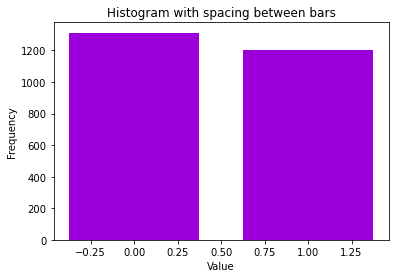

In [14]:
data = amazon['label']
min_bin = - 0.5
max_bin = 1.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

## Now, let us part our database in the three categories we have defined

In [15]:
good = amazon[amazon['label'] == 1]
bad = amazon[amazon['label'] == 0]

### In order to better visualise these, we can plot some wordclouds

In [16]:
!pip install wordcloud
from wordcloud import WordCloud

In [17]:

goods = good['reviews.text'].tolist()
goods = [str(x) for x in goods]
"""
goods_sentence = " ".join(goods)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(goods_sentence))
"""

'\ngoods_sentence = " ".join(goods)\nplt.figure(figsize=(20,20))\nplt.imshow(WordCloud().generate(goods_sentence))\n'

In [18]:

bads = bad['reviews.text'].tolist()
bads = [str(x) for x in bads]
'''
bads_sentence = " ".join(bads)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(bads_sentence))
'''

'\nbads_sentence = " ".join(bads)\nplt.figure(figsize=(20,20))\nplt.imshow(WordCloud().generate(bads_sentence))\n'

# Now it's time for some data cleaning!

## Punctuation

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# For good

g = []
for s in goods:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    g.append(s)
goods = g


In [21]:
# For bad
b = []
for s in bads:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    b.append(s)
bads = b

## Stopwords

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
rev = goods + bads
rev

['My children loved it and it is great learning tool',
 'we bought this amazon tablet because my 3 year received one as a gift for her aunt My 2 year was using an iPad but kept dropping it This is great because its small enough for him to hold and if you buy the case its completely protected The only issue we seem to have is that the power cord is really loose when you plug it in to charge so sometimes it does not get charged That is the only reason Im giving it 4 stars',
 'Awesome product Got two of these for two kids They really enjoy',
 'This is a nice and cheap android device HD display and Amazons sturdy build quality with 10 hours battery backup Sometimes runs a little slow rest is good',
 'Good features good cost Recommend to anyone looking for tablet',
 'this purchase was not for me but i decided ti purchase it for my wifeher name is rebecca',
 'Good upgrade to the Firestick Alexa search works well so you can quickly find titles',
 'I got this to test it out to see if it would 

In [25]:
all_text = ' '.join(rev)

# Tokenize the text
tokens = nltk.word_tokenize(all_text)

# Convert tokens to lowercase
tokens = [word.lower() for word in tokens]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_freq = Counter(tokens)

# Get most common words
number_of_words_to_remove = 0
top_words = [word for word, _ in word_freq.most_common(number_of_words_to_remove)]
top_words

[]

In [26]:
STOPWORDS = stopwords.words('english') + top_words

In [27]:
# For good

g = []
for s in goods:
    sentence = [word for word in s.split() if word not in STOPWORDS]
    s = ' '.join(sentence)
    g.append(s)

goods = g


In [28]:
# For bad

b = []
for s in bads:
    sentence = [word for word in s.split() if word not in STOPWORDS]
    s = ' '.join(sentence)
    b.append(s)

bads = b


## Now, let us put it all together into a pipeline:

In [29]:
def data_cleaning(text):

    Test_punc_removed = [char for char in text if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return Test_punc_removed_join_clean    

# Now we can perform tokenization!

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# amazon_clean = amazon['reviews.text'].apply(data_cleaning)

In [32]:
# print(amazon_clean[11])

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vectorizer = CountVectorizer(analyzer = data_cleaning, dtype = np.uint8)

In [35]:
amazon_countvectorizer = vectorizer.fit_transform(amazon['reviews.text'])

In [36]:
print(amazon_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
amazon_countvectorizer.shape

(2512, 6357)

In [38]:
X = pd.DataFrame(amazon_countvectorizer.toarray())

In [39]:
X

,0,1,2,3,4,5,6,7,8,9,...,6347,6348,6349,6350,6351,6352,6353,6354,6355,6356
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# We will now use Naive Bayes in order to continue:

In [40]:
y = amazon['label']

In [41]:
X.shape

(2512, 6357)

In [42]:
y.shape

(2512,)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [44]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

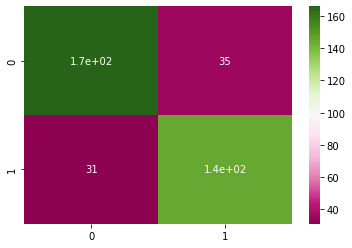

In [46]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [47]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       201
           1       0.81      0.82      0.81       176

    accuracy                           0.82       377
   macro avg       0.82      0.82      0.82       377
weighted avg       0.83      0.82      0.83       377



In [48]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,6347,6348,6349,6350,6351,6352,6353,6354,6355,6356
2166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2512 non-null   object 
 1   reviews.text    2512 non-null   object 
 2   reviews.rating  2512 non-null   float64
 3   label           2512 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 78.6+ KB


Now, we want to investigate a bit the reviews where the mosel did not predict well. Let's see how they look like:

In [50]:
bad_predictions = 50
i = 0
j = 0
#print(X_test.index)
'''while i < bad_predictions:
    if y[j] != y_predict_test[j]:
        i = i + 1
        print(j, X_test.index[j] ,amazon['reviews.rating'][X_test.index[j]]  ,y[j], y_predict_test[j], amazon['reviews.text'][X_test.index[j]])
        #print(X_test['reviews.text'][j])
    j = j + 1
#print(amazon['reviews.text'])
while i < bad_predictions:
    point = amazon['reviews.text'][j]
    #print(point)
    #pd_point = pd.DataFrame([[point]],columns=['reviews.text'])
    #print(pd_point)
    amazon_point = vectorizer.fit_transform([point])
    print(amazon_point.shape)
    #pointX = pd.DataFrame(amazon_point.toarray())
    predicted_point = NB_classifier.predict(amazon_point)
    
    j = j + 1
    i = i + 1'''
    

def predict_single_data_point(new_data_point):
    if isinstance(new_data_point, str):
        new_data_point_list = [new_data_point]
    else:
        new_data_point_list = new_data_point  # assuming it's already list-like
    
    new_data_point_vec = vectorizer.transform(new_data_point_list)
    
    prediction = NB_classifier.predict(new_data_point_vec)
    return prediction[0]  # Returning the single prediction

reviews = amazon['reviews.text'].tolist()
ratings = amazon['label'].tolist()
originalrating = amazon['reviews.rating'].tolist()
k = 0
i = 0
while i <= len(reviews) and k <= 50:
    predictrating = predict_single_data_point(reviews[i])
    if predictrating != ratings[i]:
        print((originalrating[i], predictrating, reviews[i]))
        k += 1

    i += 1
    


(2.0, 1, 'fire tablet is very powerful for the size and does everything!')
(2.0, 1, "Easy to carry in purse or pocket but doesn't do anything better than the cheapest Kindle reader.")
(1.0, 1, 'I wish this came in white to match my Kindle Paperwhite')
(1.0, 1, 'Really expected a chord with it for the price we paid. Very dissapointed.')
(2.0, 1, 'Way too expensive')
(1.0, 1, 'feel it should have come with paperwhite kindle and that I should not have had to buy it')
(1.0, 1, 'Am used to Kindle Fire which I love. No light to read by in the dark. Hard to navigate. This was a gift - would never purchase on my own.')
(2.0, 1, 'Best tablet and most affortable. Love that it just works. Must have Prime.')
(1.0, 1, 'I regretted buying this item.I will never recommend this to anyone')
(1.0, 1, 'I love using it to read and surf the internet. It is also very handy.')
(1.0, 1, 'I totally love the Kindle Fire tablets purchased for my grandkids. My sister purchased one in our hometown for my mother. S

In [51]:
sarcastic_comments = [
    "Oh, a Kindle! Just what I needed – another screen to remind me how much I hate reading.",
    "Wow, this tablet is so light! Perfect for losing it in the couch cushions.",
    "Kindle: For when you want the experience of a book, but miss the charm of paper cuts.",
    "I love my new tablet! It's amazing how quickly it becomes obsolete.",
    "Kindle Fire? More like Kindle Mildly Warm. Thrilling performance.",
    "I bought a tablet so I could stare at a screen and still feel like I'm being productive.",
    "This Kindle is fantastic! I mean, who wouldn't want to squint at a screen for hours?",
    "My tablet is perfect for reading – until the battery dies 20 minutes in.",
    "Kindle Unlimited? More like Kindle Unused. So many books, so little time.",
    "I bought this tablet for its amazing features. Too bad the battery lasts only slightly longer than my attention span.",
    "A Kindle with backlight? Because who needs sleep when you can read at 3 AM?",
    "My tablet is amazing at displaying fingerprints and smudges in high definition.",
    "Wow, the Kindle screen is so crisp! It's almost like looking at a real book. Almost.",
    "The tablet has so many features! I just wish one of them was being reliable.",
    "Bought a Kindle to reduce eye strain. Ended up needing glasses for all the tiny text."
]

In [52]:
for i in range(len(sarcastic_comments)):
    predictrating = predict_single_data_point(sarcastic_comments[i])
    print((predictrating, sarcastic_comments[i]))

(0, 'Oh, a Kindle! Just what I needed – another screen to remind me how much I hate reading.')
(1, 'Wow, this tablet is so light! Perfect for losing it in the couch cushions.')
(1, 'Kindle: For when you want the experience of a book, but miss the charm of paper cuts.')
(1, "I love my new tablet! It's amazing how quickly it becomes obsolete.")
(0, 'Kindle Fire? More like Kindle Mildly Warm. Thrilling performance.')
(0, "I bought a tablet so I could stare at a screen and still feel like I'm being productive.")
(0, "This Kindle is fantastic! I mean, who wouldn't want to squint at a screen for hours?")
(0, 'My tablet is perfect for reading – until the battery dies 20 minutes in.')
(1, 'Kindle Unlimited? More like Kindle Unused. So many books, so little time.')
(0, 'I bought this tablet for its amazing features. Too bad the battery lasts only slightly longer than my attention span.')
(1, 'A Kindle with backlight? Because who needs sleep when you can read at 3 AM?')
(1, 'My tablet is amazing

In [53]:
confusing_comments = [
    "I hate this Kindle. It is very bad.",
    "I hated all Kindles before but now that I've discovered this one I'll keep it for life.",
    "I thought I would never enjoy reading on a screen, but this tablet changed my mind!",
    "I was skeptical about buying a tablet, but this one has exceeded all my expectations.",
    "I didn't expect much from a Kindle, but this one turned out to be a pleasant surprise.",
    "I usually despise electronic readers, but this Kindle has won me over.",
    "Never liked tablets, but this one is an exception. It’s fantastic!",
    "I wasn't a fan of Kindles, but this model is an absolute game-changer.",
    "I didn't believe I could like a tablet until I tried this one. It's amazing!",
    "I was always against using tablets for reading, but this one is incredible.",
    "Never thought I would say this, but this Kindle is now my favorite device.",
    "I was hesitant to switch to a Kindle, but I’m glad I did with this model.",
    "I've always disliked tablets, but this one is truly exceptional.",
    "I used to avoid e-readers, but this Kindle has made me a believer.",
    "I never thought I’d be happy with a tablet purchase, but this one proved me wrong.",
    "Despite my initial doubts, this Kindle turned out to be a great buy."
]

In [54]:
for i in range(len(confusing_comments)):
    predictrating = predict_single_data_point(confusing_comments[i])
    print((predictrating, confusing_comments[i]))

(0, 'I hate this Kindle. It is very bad.')
(0, "I hated all Kindles before but now that I've discovered this one I'll keep it for life.")
(0, 'I thought I would never enjoy reading on a screen, but this tablet changed my mind!')
(1, 'I was skeptical about buying a tablet, but this one has exceeded all my expectations.')
(0, "I didn't expect much from a Kindle, but this one turned out to be a pleasant surprise.")
(1, 'I usually despise electronic readers, but this Kindle has won me over.')
(1, 'Never liked tablets, but this one is an exception. It’s fantastic!')
(0, "I wasn't a fan of Kindles, but this model is an absolute game-changer.")
(0, "I didn't believe I could like a tablet until I tried this one. It's amazing!")
(1, 'I was always against using tablets for reading, but this one is incredible.')
(0, 'Never thought I would say this, but this Kindle is now my favorite device.')
(1, 'I was hesitant to switch to a Kindle, but I’m glad I did with this model.')
(1, "I've always dislike

In [55]:
mixed_sentiment_comments = [
    "The Kindle has a lot of great features, but the battery life is awful.",
    "I love the screen quality, but the device is so slow.",
    "Great for reading, but it's a bit heavy to carry around.",
    "The tablet's performance is excellent, though it crashes occasionally.",
    "The Kindle is fantastic for reading books, but the interface is not user-friendly.",
    "I adore the display, but the touch screen is unresponsive at times.",
    "The battery life is amazing, but I hate the constant updates.",
    "Wonderful for reading, although the design feels a bit outdated.",
    "Excellent build quality, but the software is buggy.",
    "The tablet's screen is superb, but it takes forever to charge."
]
sarcastic_positive_comments = [
    "Oh, sure, I totally bought this Kindle just for the lovely long charging times.",
    "I absolutely love how this tablet dies right when I'm in the middle of something important.",
    "Who needs speed and performance when you have such a sleek design, right?",
    "Great, another device that needs a software update every other day. So convenient.",
    "Fantastic! I needed another device to remind me why I prefer physical books.",
    "Wonderful! I always wanted a tablet that works perfectly... sometimes.",
    "Oh, joy! I can finally spend more time updating my Kindle than reading on it.",
    "This tablet is amazing at showing me how patient I can be with its slow performance.",
    "I just adore how this Kindle gives me an excuse to take reading breaks while it charges.",
    "Perfect! I love how this tablet reminds me of the good old days of dial-up speeds."
]
ambiguous_comments = [
    "The Kindle is something else.",
    "This tablet sure is different.",
    "Using this device is quite an experience.",
    "This Kindle definitely stands out.",
    "Well, this tablet is interesting.",
    "The Kindle is not what I expected.",
    "This tablet sure knows how to make an impression.",
    "The Kindle left me with a lot to think about.",
    "This tablet is quite unique.",
    "The Kindle offers a distinct reading experience."
]

In [56]:
for i in range(len(mixed_sentiment_comments)):
    predictrating = predict_single_data_point(mixed_sentiment_comments[i])
    print((predictrating, mixed_sentiment_comments[i]))

(1, 'The Kindle has a lot of great features, but the battery life is awful.')
(0, 'I love the screen quality, but the device is so slow.')
(1, "Great for reading, but it's a bit heavy to carry around.")
(1, "The tablet's performance is excellent, though it crashes occasionally.")
(1, 'The Kindle is fantastic for reading books, but the interface is not user-friendly.')
(0, 'I adore the display, but the touch screen is unresponsive at times.')
(1, 'The battery life is amazing, but I hate the constant updates.')
(1, 'Wonderful for reading, although the design feels a bit outdated.')
(0, 'Excellent build quality, but the software is buggy.')
(0, "The tablet's screen is superb, but it takes forever to charge.")


In [57]:
for i in range(len(sarcastic_positive_comments)):
    predictrating = predict_single_data_point(sarcastic_positive_comments[i])
    print((predictrating, sarcastic_positive_comments[i]))

(0, 'Oh, sure, I totally bought this Kindle just for the lovely long charging times.')
(1, "I absolutely love how this tablet dies right when I'm in the middle of something important.")
(0, 'Who needs speed and performance when you have such a sleek design, right?')
(0, 'Great, another device that needs a software update every other day. So convenient.')
(1, 'Fantastic! I needed another device to remind me why I prefer physical books.')
(1, 'Wonderful! I always wanted a tablet that works perfectly... sometimes.')
(0, 'Oh, joy! I can finally spend more time updating my Kindle than reading on it.')
(0, 'This tablet is amazing at showing me how patient I can be with its slow performance.')
(1, 'I just adore how this Kindle gives me an excuse to take reading breaks while it charges.')
(1, 'Perfect! I love how this tablet reminds me of the good old days of dial-up speeds.')


In [58]:
for i in range(len(ambiguous_comments)):
    predictrating = predict_single_data_point(ambiguous_comments[i])
    print((predictrating, ambiguous_comments[i]))

(0, 'The Kindle is something else.')
(0, 'This tablet sure is different.')
(0, 'Using this device is quite an experience.')
(1, 'This Kindle definitely stands out.')
(0, 'Well, this tablet is interesting.')
(1, 'The Kindle is not what I expected.')
(0, 'This tablet sure knows how to make an impression.')
(0, 'The Kindle left me with a lot to think about.')
(0, 'This tablet is quite unique.')
(0, 'The Kindle offers a distinct reading experience.')


# More Methods:

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       201
           1       0.78      0.80      0.79       176

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.80      0.80      0.80       377



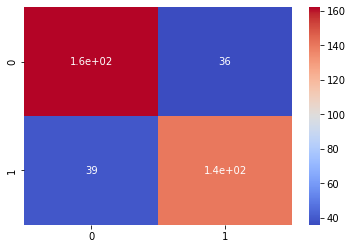

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))

# At this point we can observe that the accuracy is worryingly low, how the model works best on extremes, but has really big troubles in detecting the neutral labels. We will therefore train on the whole database for the sake of it and look for a better accuracy - at least for the extreme labels.

In [60]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

C:\Users\andre\AppData\Local\Temp\ipykernel_27400\2946610846.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [61]:
amazon = amazon_reviews[['id', 'reviews.text', 'reviews.rating']]
amazon.describe()

,reviews.rating
count,34627.000000
mean,4.584573
std,0.735653
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## In case we have NaN entries for the reviews' text, we just "clean" them:

In [62]:
amazon['reviews.text'] = amazon['reviews.text'].fillna('')

C:\Users\andre\AppData\Local\Temp\ipykernel_27400\730739416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['reviews.text'] = amazon['reviews.text'].fillna('')


In [63]:
def label(r):
    if r >= 4.0:
        return 1
    return 0


amazon['label'] = amazon['reviews.rating'].apply(label)
amazon.describe()

C:\Users\andre\AppData\Local\Temp\ipykernel_27400\2641580566.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['label'] = amazon['reviews.rating'].apply(label)


,reviews.rating,label
count,34627.000000,34660.000000
mean,4.584573,0.932372
std,0.735653,0.251111
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


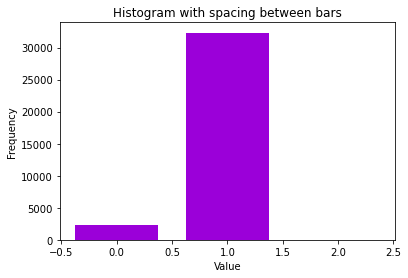

In [64]:
data = amazon['label']
min_bin = - 0.5
max_bin = 2.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

In [65]:
vectorizer = CountVectorizer(analyzer = data_cleaning, dtype = np.uint8)
amazon_countvectorizer = vectorizer.fit_transform(amazon['reviews.text'])
print(amazon_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
X = pd.DataFrame(amazon_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,22322,22323,22324,22325,22326,22327,22328,22329,22330,22331
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y = amazon['label']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [69]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

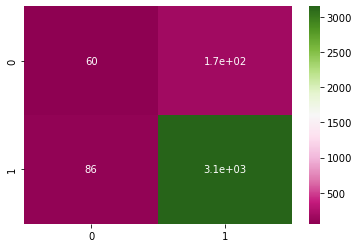

In [70]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [71]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.41      0.26      0.32       232
           1       0.95      0.97      0.96      3234

    accuracy                           0.93      3466
   macro avg       0.68      0.62      0.64      3466
weighted avg       0.91      0.93      0.92      3466



## For more methods:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))